In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [125]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Training set has 891 rows and have 12 features 
* Testing  set has 418 rows and have 11 features
* The difference is the Survived feature

In [128]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Data Analysis

* *PassengerId* is the unique id of the row and it doesn't have any effect on target
* *Survived* is the target variable we are trying to predict (0 or 1):
  * 1 = Survived
  * 0 = Not Survived
* *Pclass* (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    * 1 = Upper Class
    * 2 = Middle Class
    * 3 = Lower Class
* *Name*, *Sex* and *Age* are self-explanatory
* *SibSp* is the total number of the passengers' siblings and spouse
* *Parch* is the total number of the passengers' parents and children
* *Ticket* is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

# Missing Values

In [129]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




* Training set have missing values in Age, Cabin and Embarked columns
* Test set have missing values in Age, Cabin and Fare columns
It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples.

The missing values in Age, Embarked and Fare are smaller compared to total sample(can be filled with descriptive statistical measures), but Cabin feature has almost 80% of missing data, which seems a good indicator to discard it. 


## Handle Missing Values in Age

Missing values in Age can filled with median age
> df_all.Age.fillna(training.Age.median())

- But using median age of the whole data set is not a good choice. 
- Median age of Pclass groups is the best choice because of its high correlation with Age (0.408106) and Survived (0.338481). It is also more logical to group ages by passenger classes instead of other features.

                  Age      Fare     Parch  PassengerId    Pclass     SibSp  \
Age          1.000000  0.178740 -0.150917     0.028814 -0.408106 -0.243699   
Fare         0.178740  1.000000  0.221539     0.031428 -0.558629  0.160238   
Parch       -0.150917  0.221539  1.000000     0.008942  0.018322  0.373587   
PassengerId  0.028814  0.031428  0.008942     1.000000 -0.038354 -0.055224   
Pclass      -0.408106 -0.558629  0.018322    -0.038354  1.000000  0.060832   
SibSp       -0.243699  0.160238  0.373587    -0.055224  0.060832  1.000000   
Survived    -0.077221  0.257307  0.081629    -0.005007 -0.338481 -0.035322   

             Survived  
Age         -0.077221  
Fare         0.257307  
Parch        0.081629  
PassengerId -0.005007  
Pclass      -0.338481  
SibSp       -0.035322  
Survived     1.000000  


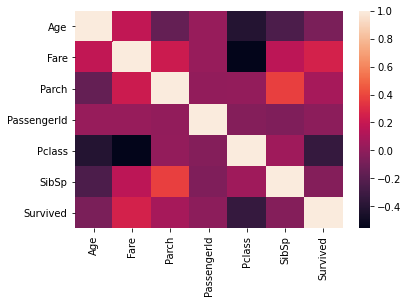

In [130]:
df_all_corr = df_all.corr()
print(df_all_corr)
sns.heatmap(df_all_corr)

In [131]:
df_all_corr= df_all_corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr

,level_0,level_1,0
0,Survived,Survived,1.000000
1,SibSp,SibSp,1.000000
2,Fare,Fare,1.000000
3,Parch,Parch,1.000000
4,Pclass,Pclass,1.000000
5,PassengerId,PassengerId,1.000000
6,Age,Age,1.000000
7,Fare,Pclass,0.558629
8,Pclass,Fare,0.558629
9,Age,Pclass,0.408106


In [132]:
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In order to be more accurate, **Sex** feature is used as the second level of groupby while filling the missing Age values.

As seen from below, Pclass and Sex groups have distinct median Age values.

- When passenger class increases, the median age for both males and females also increases. 
- However, females tend to have slightly lower median Age than males. The median ages below are used for filling the missing values in Age feature.

In [133]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

age_by_pclass_sex
                                                               

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [134]:
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


## Handling missing Values in Embarked feature
It is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number. This means that they know each other and embarked from the same port together. 

The mode Embarked value for an upper class female passenger is C (Cherbourg), but this doesn't necessarily mean that they embarked from that port.

In [135]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


According to Google Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.

In [136]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')

## Handling Missing Values for FARE

In [137]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


There is only 1 passenger with missing Fare value. We can assume that Fare is related to family size (Parch and SibSp) and Pclass features. 
-> Median Fare value of a male with a third class ticket and no family is a logical choice to fill the missing value.

In [138]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp'])
med_fare_df = med_fare.Fare.median()
med_fare_df

Pclass  Parch  SibSp
1       0      0         31.33960
               1         75.25000
               2         51.47920
        1      0         63.35830
               1         83.15830
        2      0         83.15830
               1        120.00000
               2        262.37500
               3        263.00000
        3      1        262.37500
        4      1        263.00000
2       0      0         13.00000
               1         26.00000
               2         73.50000
               3         21.00000
        1      0         23.00000
               1         26.25000
               2         33.00000
        2      0         26.25000
               1         41.57920
        3      0         39.00000
               1         23.00000
               2         18.75000
3       0      0          7.85420
               1         14.45625
               2         19.83960
               3         16.92500
        1      0         12.47500
               1         15

In [139]:
print(med_fare_df[3][0][0])
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare_df[3][0][0])

7.8542


## Handling Missing Values for Cabin feature
There are 1014 rows with Null values on Cabin feature.

The first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.

In [140]:
df_all['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' '))).value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: Cabin, dtype: int64

In [141]:
df_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [142]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'})

df_all_decks

Count
Deck Pclass       
A    1          22
B    1          65
C    1          94
D    1          40
     2           6
E    1          34
     2           4
     3           3
F    2          13
     3           8
G    3           5
M    1          67
     2         254
     3         693
T    1           1

In [143]:
df_all_decks = df_all_decks.transpose()
df_all_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

In [144]:
def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0] # if was levels[1], the results will be Pclass distributions   
    print("decks {}".format(decks))
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

In [145]:
def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#34eb46', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#34857f', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#8766e8', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()

In [146]:
all_deck_count, all_deck_percentage = get_pclass_dist(df_all_decks)
print("all_deck_count:{}\n all_deck_percentage:{}".format(all_deck_count, all_deck_percentage))

decks Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'], dtype='object', name='Deck')
all_deck_count:{'A': {1: 22, 2: 0, 3: 0}, 'B': {1: 65, 2: 0, 3: 0}, 'C': {1: 94, 2: 0, 3: 0}, 'D': {1: 40, 2: 6, 3: 0}, 'E': {1: 34, 2: 4, 3: 3}, 'F': {1: 0, 2: 13, 3: 8}, 'G': {1: 0, 2: 0, 3: 5}, 'M': {1: 67, 2: 254, 3: 693}, 'T': {1: 1, 2: 0, 3: 0}}
 all_deck_percentage:{'A': [100.0, 0.0, 0.0], 'B': [100.0, 0.0, 0.0], 'C': [100.0, 0.0, 0.0], 'D': [86.95652173913044, 13.043478260869565, 0.0], 'E': [82.92682926829268, 9.75609756097561, 7.317073170731707], 'F': [0.0, 61.904761904761905, 38.095238095238095], 'G': [0.0, 0.0, 100.0], 'M': [6.607495069033531, 25.04930966469428, 68.34319526627219], 'T': [100.0, 0.0, 0.0]}


**What does this represent?**
- 100% of A, B and C decks are 1st class passengers
- Deck D has 87% 1st class and 13% 2nd class passengers
- Deck E has 83% 1st class, 10% 2nd class and 7% 3rd class passengers
- Deck F has 62% 2nd class and 38% 3rd class passengers
- 100% of G deck are 3rd class passengers

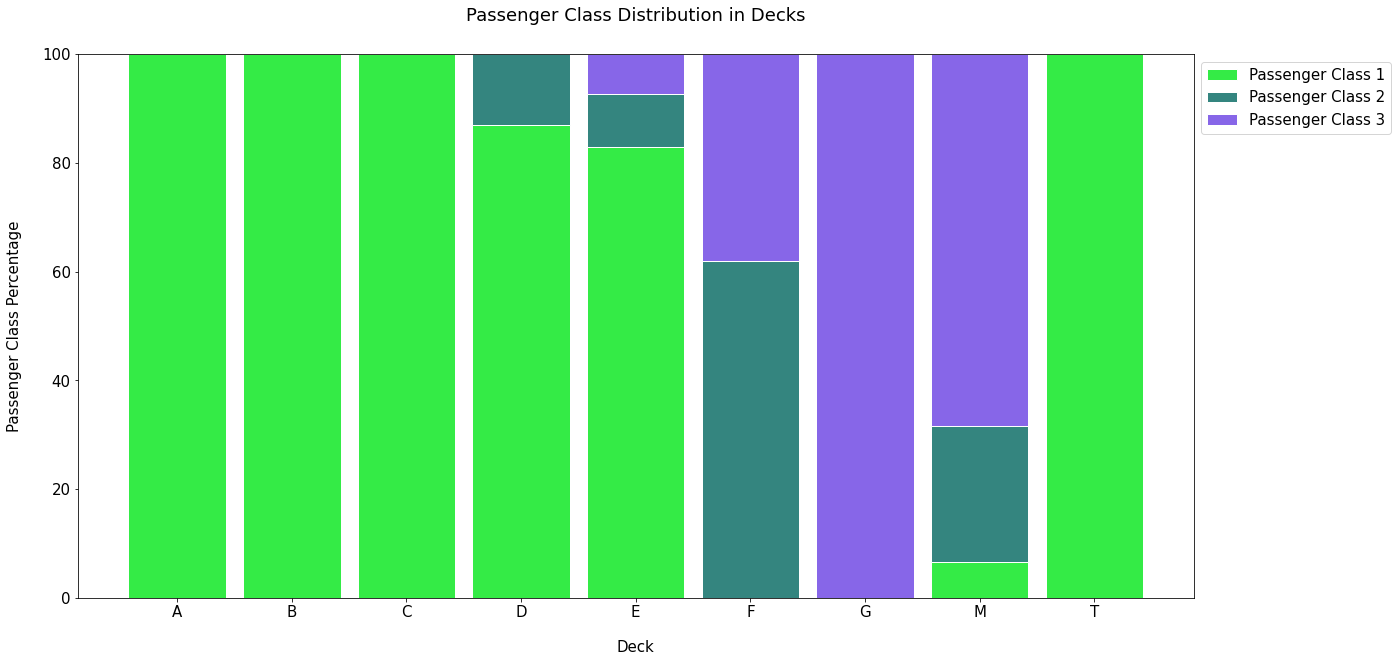

In [147]:
display_pclass_dist(all_deck_percentage)

- There is one person on the boat deck in T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A, B or C deck passengers so he is grouped with A deck
- Passengers labeled as M(Missing) are the missing values in Cabin feature. Quite a lot, we'll leave it as it is.

In [148]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

In [149]:
df_all.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Deck'],
      dtype='object')

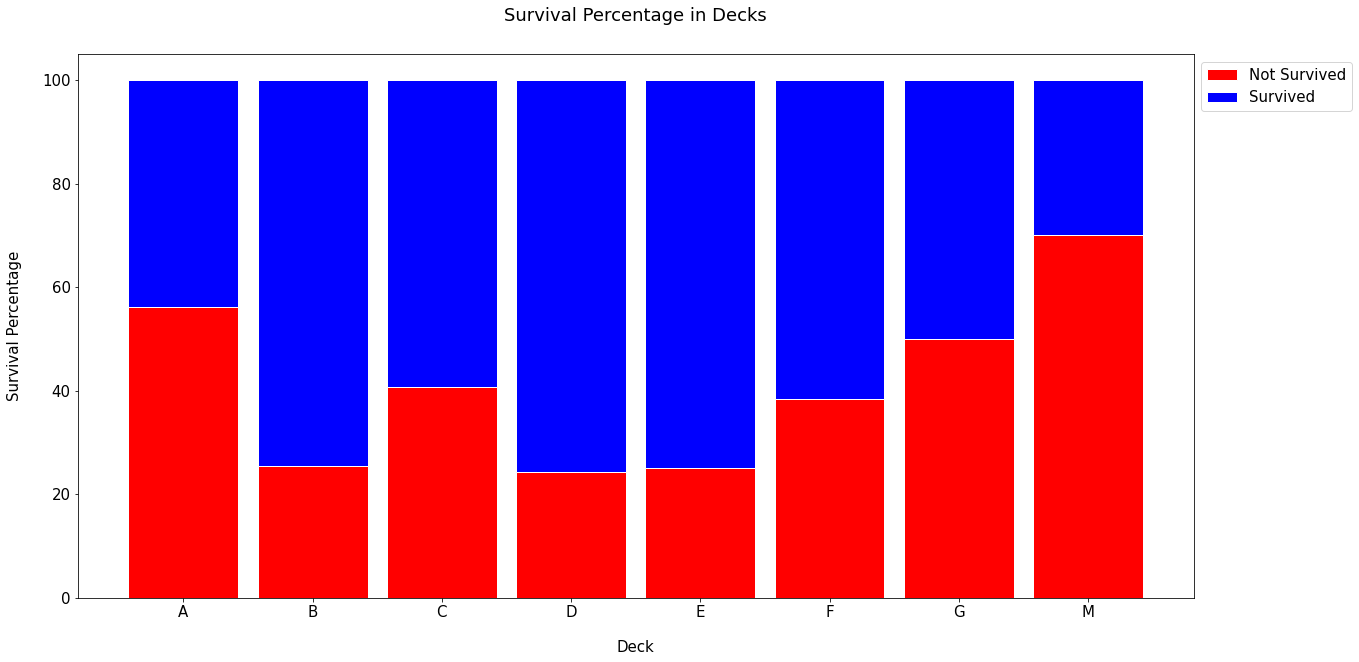

In [150]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'PassengerId',
                                                                                   'Pclass', 'Sex', 'SibSp', 'Ticket', ]).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='red', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='blue', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

 "Conclusions"
 - Deck B, C, D and E have the highest survival rates. Those decks are mostly occupied by 1st class passengers
 - On the other hand, M has the lowest survival rate which is mostly occupied by 2nd and 3rd class passengers.
 - Cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers.
 - Seems logic that missing values in M are more non surival results, as they couldn't retrieve the cabin data of the victims. 
 
Lets make groups on Decks, to decrese the number of new features:

- A, B and C decks are labeled as ABC because all of them have only 1st class passengers
- D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
- F and G decks are labeled as FG because of the same reason above
- M is very different itself from others and has the lowest survival rate.


In [151]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

# Finish Handling Missing Values

In [152]:
df_all.drop(['Cabin'], axis=1, inplace=True)
df_all.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Deck             0
dtype: int64

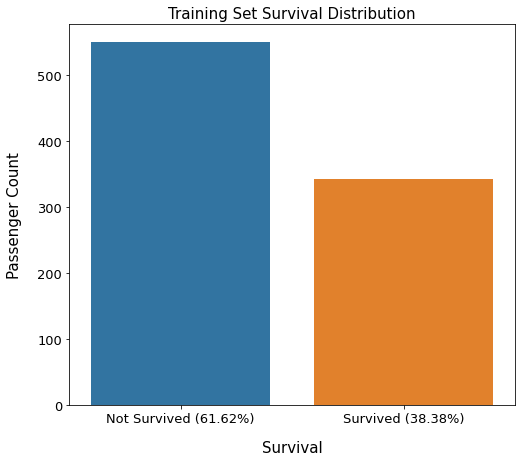

In [153]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

plt.figure(figsize=(8, 7))
sns.countplot(df_train['Survived'])

plt.xlabel('Survival', size=15, labelpad=15)
plt.ylabel('Passenger Count', size=15, labelpad=15)
plt.xticks((0, 1), ['Not Survived ({0:.2f}%)'.format(not_survived_per), 'Survived ({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Survival Distribution', size=15)

plt.show()

In [154]:
# Returning df_train and df_test
df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

# Correlations

In [155]:
def corr_plot(df_correlation,isTest=False):
    plt.figure(figsize=(8, 7))
    sns.heatmap(df_correlation, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
    plt.tick_params(axis='y', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    if isTest:    
        plt.title('Test Set Correlations', size=15)
    else:
        plt.title('Training Set Correlations', size=15)

    plt.show()

   Feature 1 Feature 2  Correlation Coefficient
6     Pclass      Fare                 0.549500
8     Pclass       Age                 0.417667
10     SibSp     Parch                 0.414838
12  Survived    Pclass                 0.338481
14  Survived      Fare                 0.257307
16     SibSp       Age                 0.249747
18     Parch      Fare                 0.216225
20       Age     Parch                 0.176733
22     SibSp      Fare                 0.159651
24       Age      Fare                 0.124061
26    Pclass     SibSp                 0.083081
28  Survived     Parch                 0.081629
30       Age  Survived                 0.058635
32  Survived     SibSp                 0.035322
34     Parch    Pclass                 0.018443


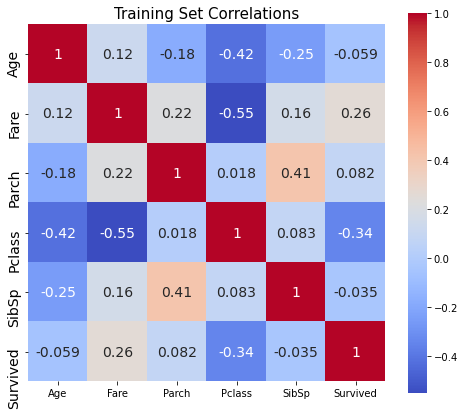

   Feature 1 Feature 2  Correlation Coefficient
6       Fare    Pclass                 0.577489
8        Age    Pclass                 0.526789
10      Fare       Age                 0.345347
12     Parch     SibSp                 0.306895
14      Fare     Parch                 0.230410
16      Fare     SibSp                 0.172032
18     SibSp       Age                 0.082493
20     Parch       Age                 0.059993
22    Pclass     Parch                 0.018721
24     SibSp    Pclass                 0.001087


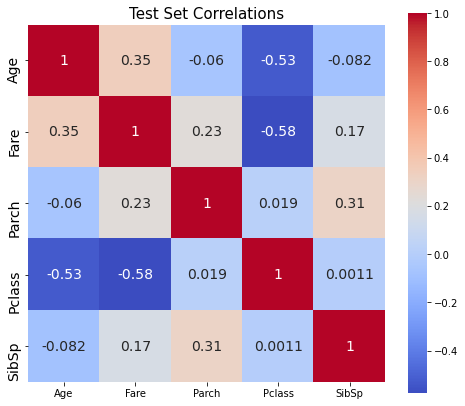

In [156]:
df_train_corr_all = df_train.drop(['PassengerId'], axis=1).corr()
df_train_corr = df_train_corr_all.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True) # remove even indexes, to avoid repetition
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index) # remove correlation rows of 1 (where F1 & F2 are the same feature)
print(df_train_corr_nd)
corr_plot(df_train_corr_all)


df_test_corr_all = df_test.drop(['PassengerId'], axis=1).corr()
df_test_corr = df_test_corr_all.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)
print(df_test_corr_nd)
corr_plot(df_test_corr_all, True)

In [157]:
# Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.549500
8,Pclass,Age,0.417667
10,SibSp,Parch,0.414838
12,Survived,Pclass,0.338481
14,Survived,Fare,0.257307
16,SibSp,Age,0.249747
18,Parch,Fare,0.216225
20,Age,Parch,0.176733
22,SibSp,Fare,0.159651
24,Age,Fare,0.124061


In [158]:
# Test set high correlations
corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.577489
8,Age,Pclass,0.526789
10,Fare,Age,0.345347
12,Parch,SibSp,0.306895
14,Fare,Parch,0.230410
16,Fare,SibSp,0.172032


Features are highly correlated with each other and dependent to each other.

The highest correlation between features is 0.549500 in training set and 0.577147 in test set , and are related to "Fare" and "Pclass". 

There are 9 correlations in training set and 6 correlations in test set that are higher than 0.1.

# Distribution Features: Categorial vs Continuous

In [159]:
cat_features = ['Embarked', 'Pclass', 'Sex', 'SibSp', 'Deck','Parch']
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

## Categorical Features
- Every categorical feature has at least one class with high mortality rate. Those classes are very helpful to predict whether the passenger is a survivor or victim.

- Best categorical features are **Pclass** **Embarked** and **Sex** because they have the **most homogenous distributions** .

- Passengers boarded from Southampton has a lower survival rate unlike other ports. 
- More than half of the passengers boarded from Cherbourg had survived. This observation could be related to Pclass feature.
- Parch and SibSp features show that passengers with only one family member has a higher survival rate.

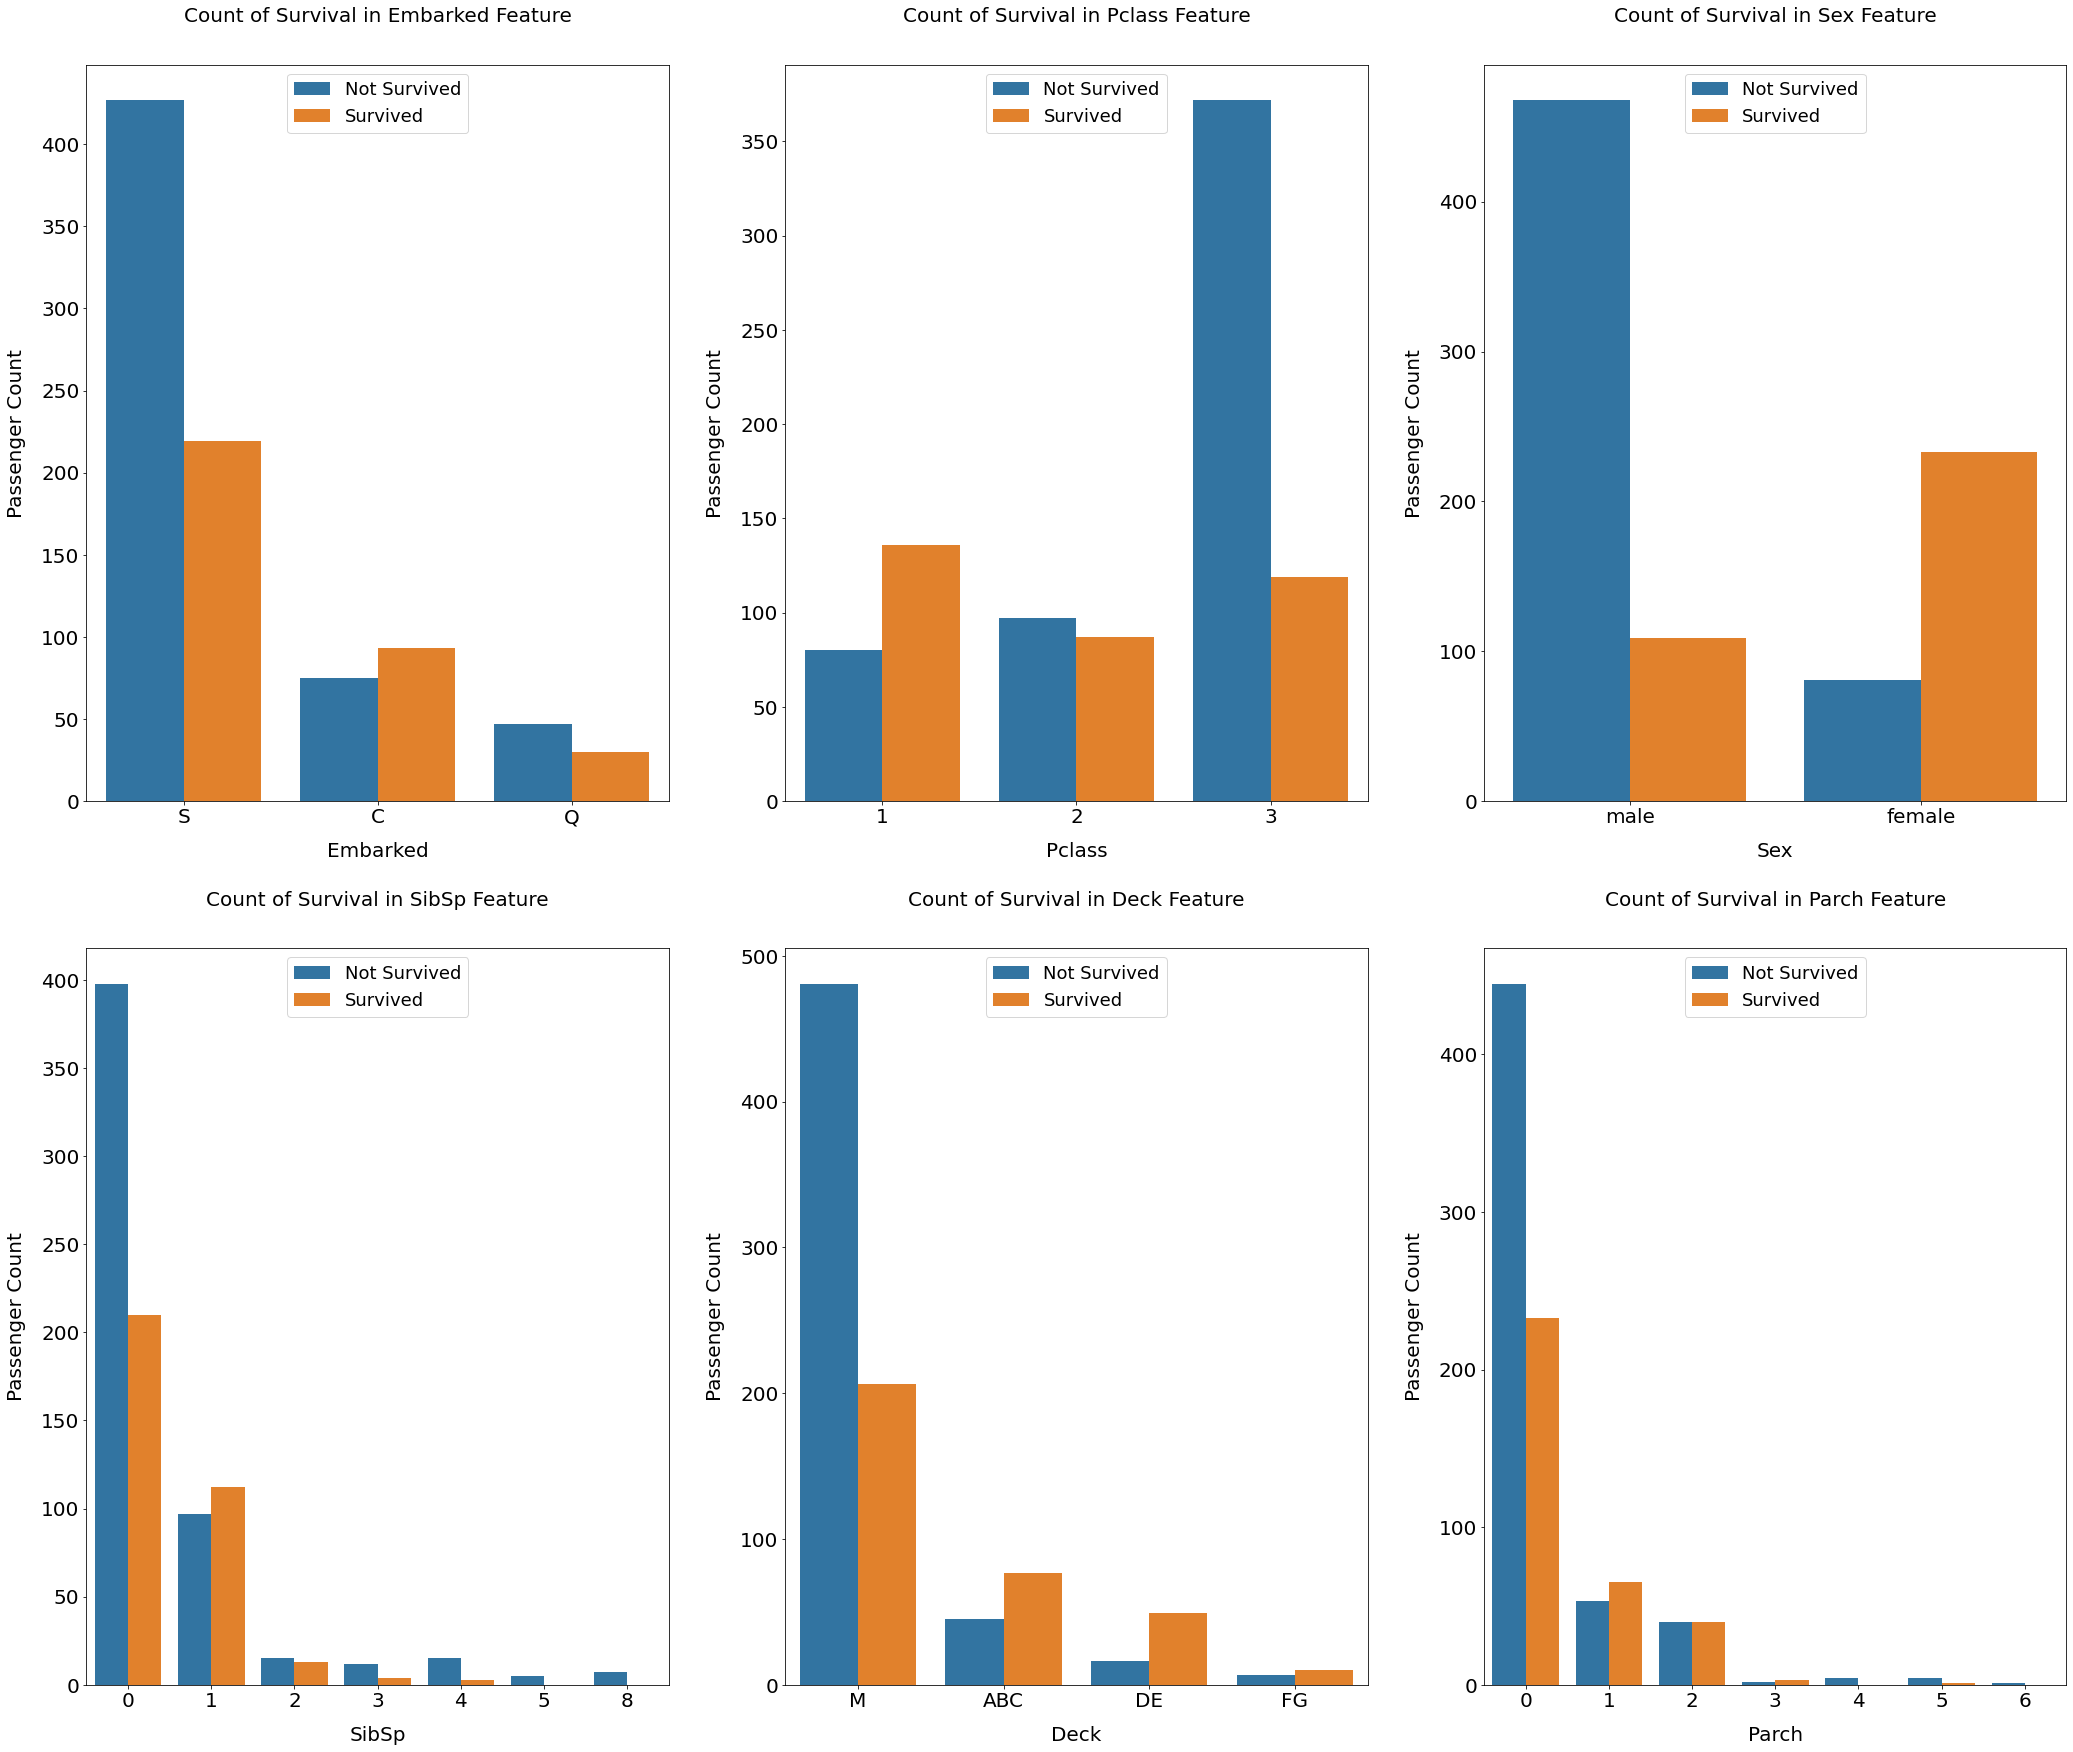

In [160]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

## Continuous Distribution

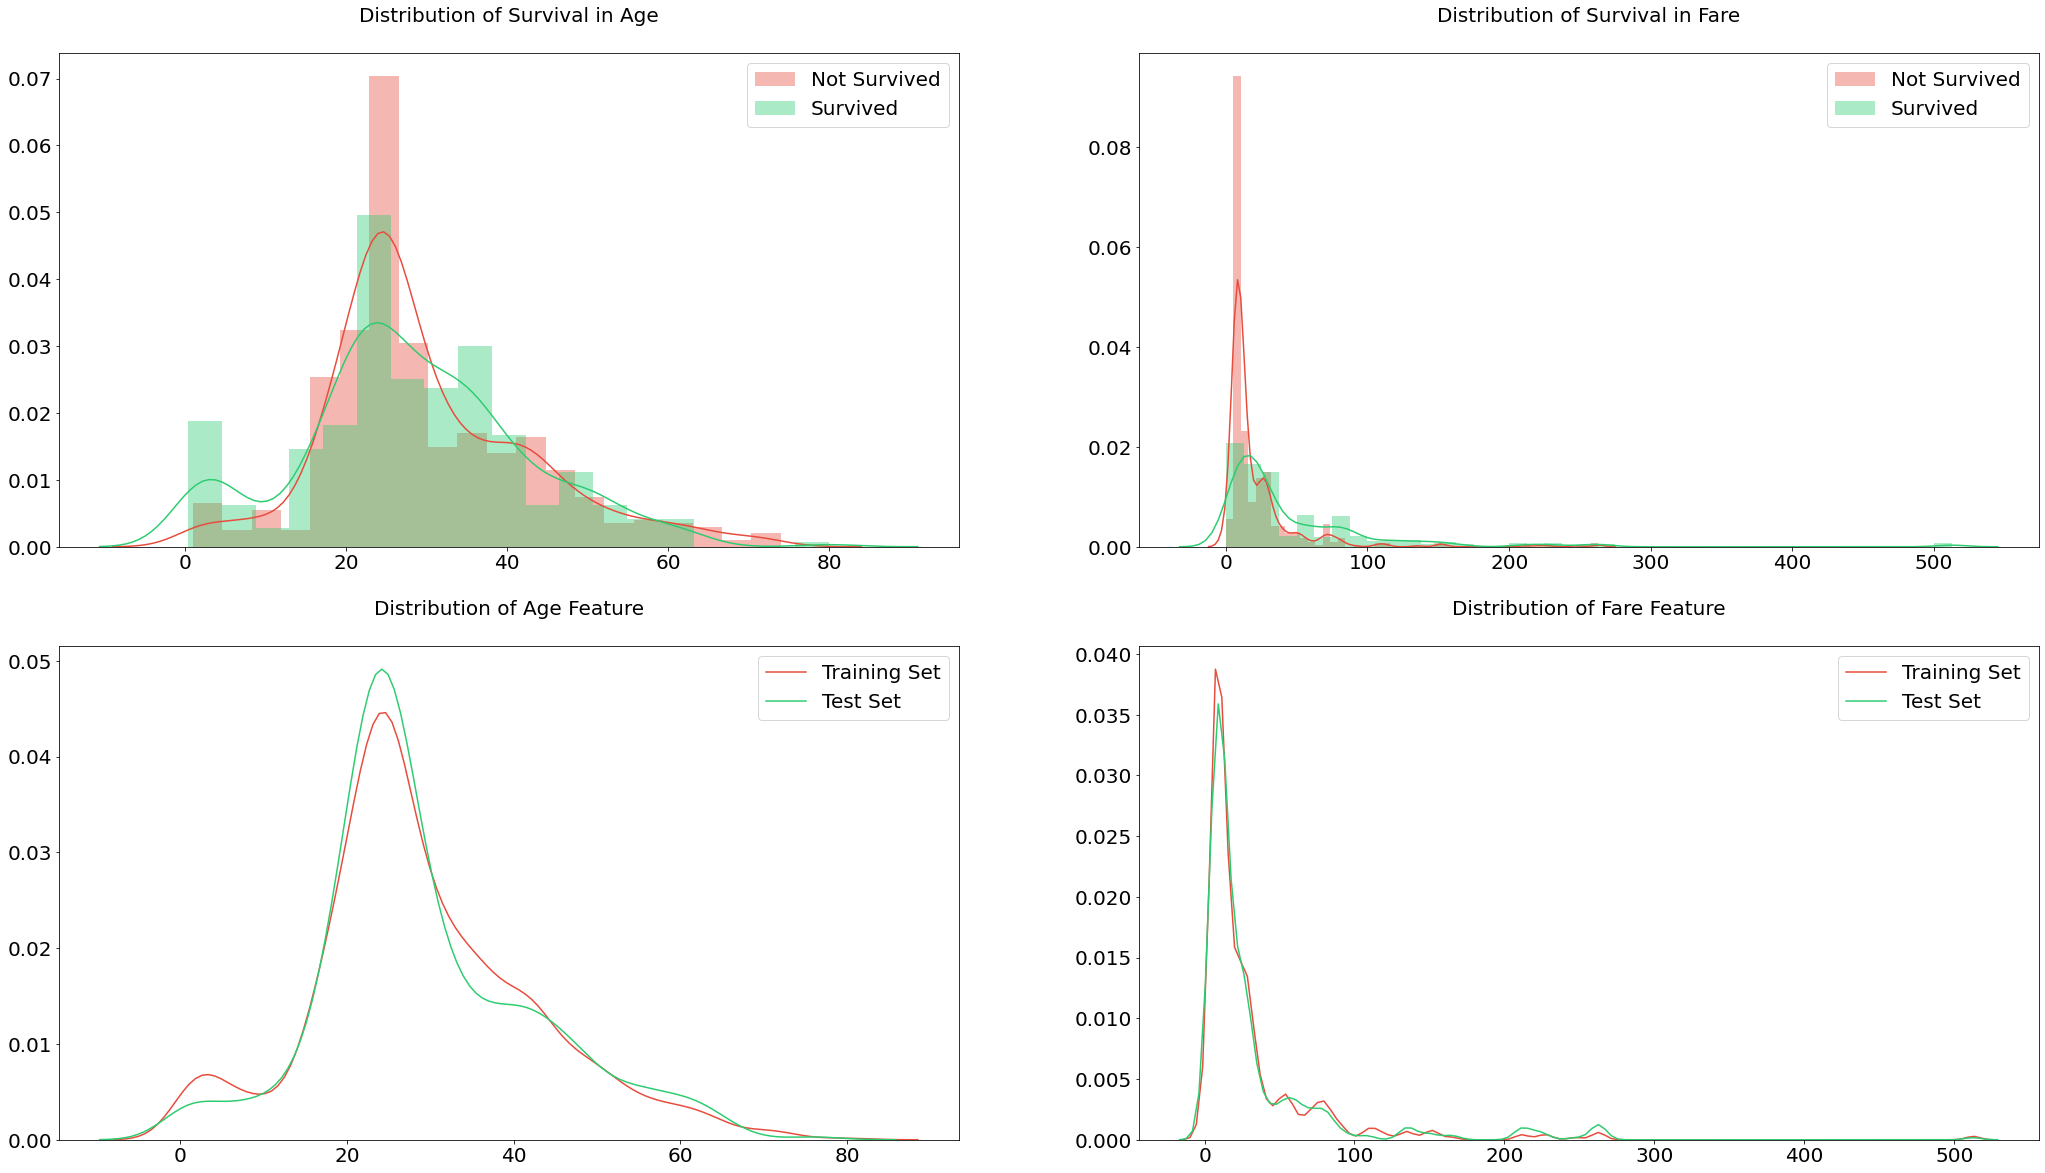

In [161]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(df_train[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(df_train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(df_train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

Both of the continuous features (Age and Fare) have good split points and spikes for a decision tree to learn. One potential problem for both features is, the distribution has more spikes and bumps in training set, but it is smoother in test set. Model may not be able to generalize to test set because of this reason.

Distribution of Age feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups
In distribution of Fare feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extremely large outliers

# Conclusion in EDA

Correlations:

- Most of the features are correlated with each other. This relationship can be used to create new features with feature transformation and feature interaction. 

- Target encoding could be very useful as well because of the high correlations with Survived feature.

Continuos Distrib:
- Split points and spikes are visible in continuous features. They can be captured easily with a decision tree model, but linear models may not be able to spot them.

Categorical Distrib:

- Categorical features have very distinct distributions with different survival rates. Those features can be one-hot encoded. Some of those features may be combined with each other to make new features.

In [162]:
df_all = concat_df(df_train, df_test)
df_all.head()
# Only Canbin was removed from the original set of columns

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# Feature Engineering
## In Continuous Features (Binning)

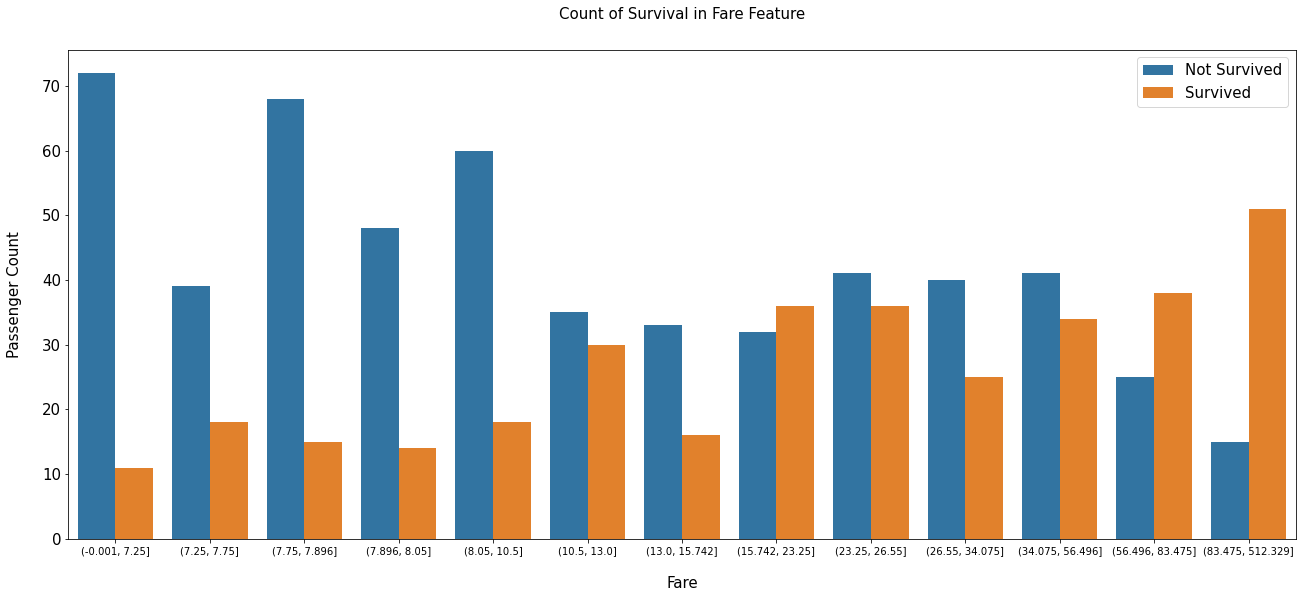

In [171]:
df_all['Fare_bin'] = pd.qcut(df_all['Fare'], 13)

# Plot Fare Feature Binning
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare_bin', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

Even though the bins are too much, 13 of them provide decent amount of information gain. 

With this amount of bins ,we were able to find an unusual group (15.742, 23.25] in the middle with high survival rate that is captured in this process. This was not possible with +/- 2 bins

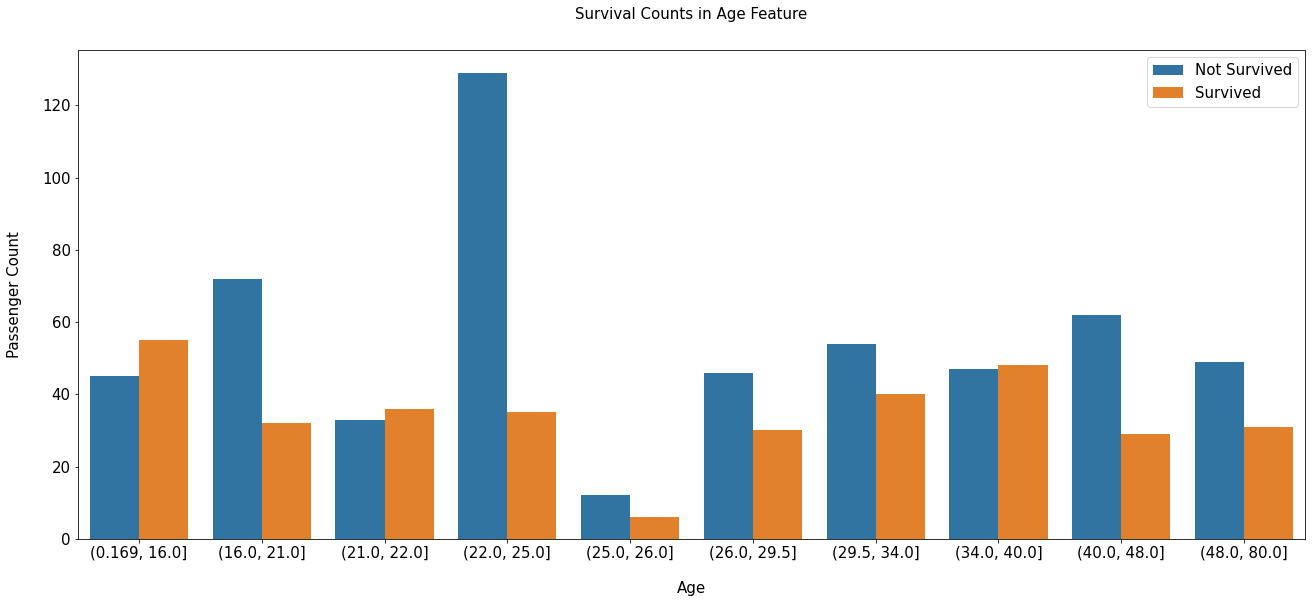

In [176]:
df_all['Age_bin'] = pd.qcut(df_all['Age'], 10) 

# PLot Age bin 
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age_bin', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

We use 10 bins, the maximun number of possible bins.

The first bin has the highest survival rate and 4th bin has the lowest survival rate. 

Those were the biggest spikes in the distribution. There is also an unusual group (34.0, 40.0] with high survival rate that is captured in this process.

##  Frequency Encoding - Family Size
Family_Size is created by adding SibSp(count of siblings and spouse), Parch(count of parents and children) and 1.

* Those columns are added in order to find the total size of families. Adding 1 at the end, is the current passenger.

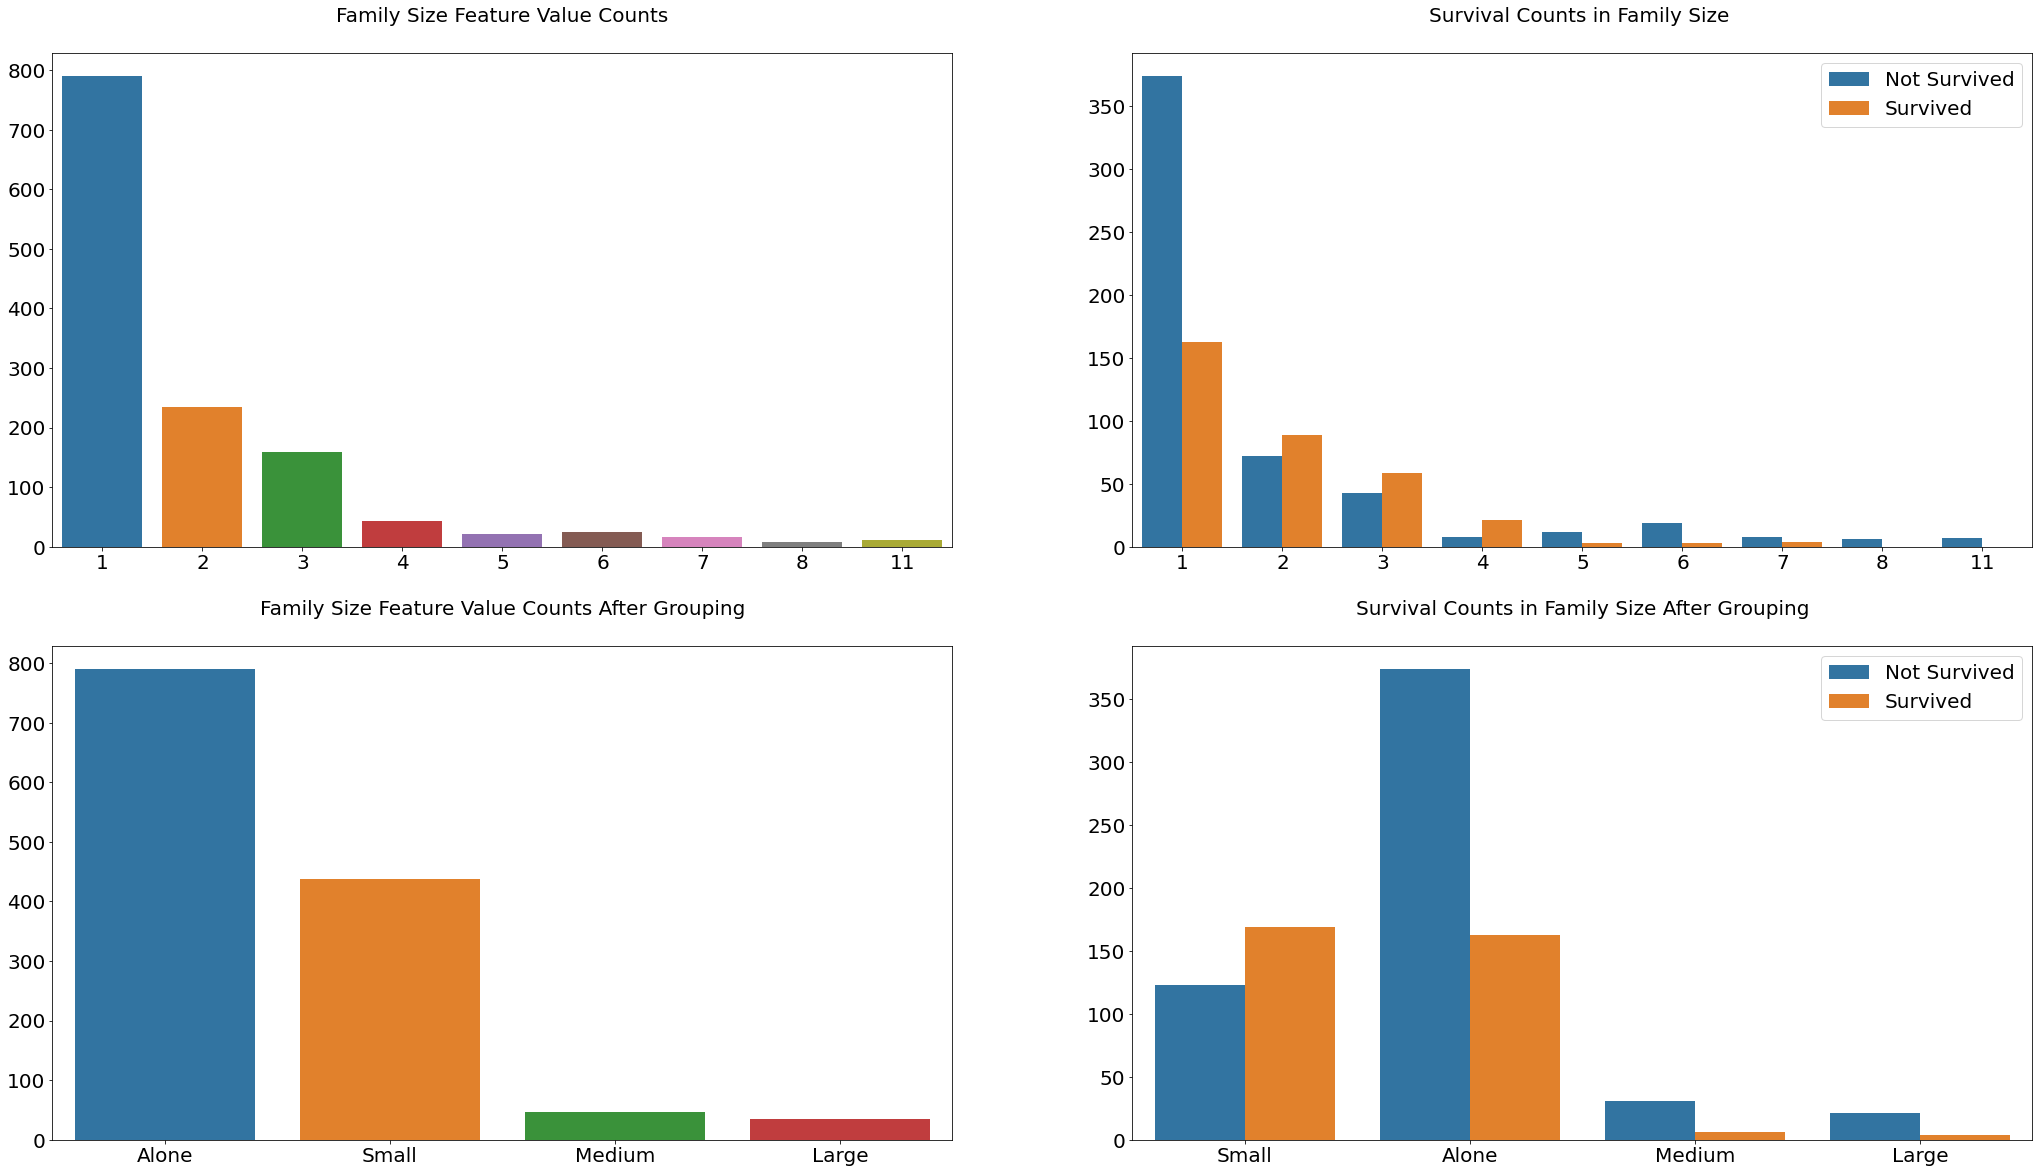

In [178]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
# create bins for distributions
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)


# Plot Family size and group Frecuency
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)
#--------------Family_Size--------------
df_family_counts = df_all['Family_Size'].value_counts()

sns.barplot(x=df_family_counts.index, y=df_family_counts.values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

#--------------Family_Size_Grouped---------
df_family_grouped = df_all['Family_Size_Grouped'].value_counts()

sns.barplot(x=df_family_grouped.index, y=df_family_grouped.values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)
#----------------------------------
for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

**Analysis**

Graphs have clearly shown that family size is a predictor of survival because different values have different survival rates.

##  Frequency Encoding - Ticket Frecuency
There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier.

***How is this feature different than Family_Size?*** Many passengers travelled along with groups. Those groups consist of friends, nannies, maids and etc. They weren't counted as family, but they used the same ticket.

***Why not grouping tickets by their prefixes?*** If prefixes in Ticket feature has any meaning, then they are already captured in Pclass or Embarked features because that could be the only logical information which can be derived from the Ticket feature.

According to the graph below, groups with 2,3 and 4 members had a higher survival rate. Passengers who travel alone has the lowest survival rate. After 4 group members, survival rate decreases drastically. This pattern is very similar to Family_Size feature but there are minor differences. Ticket_Frequency values are not grouped like Family_Size because that would basically create the same feature with perfect correlation. This kind of feature wouldn't provide any additional information gain.

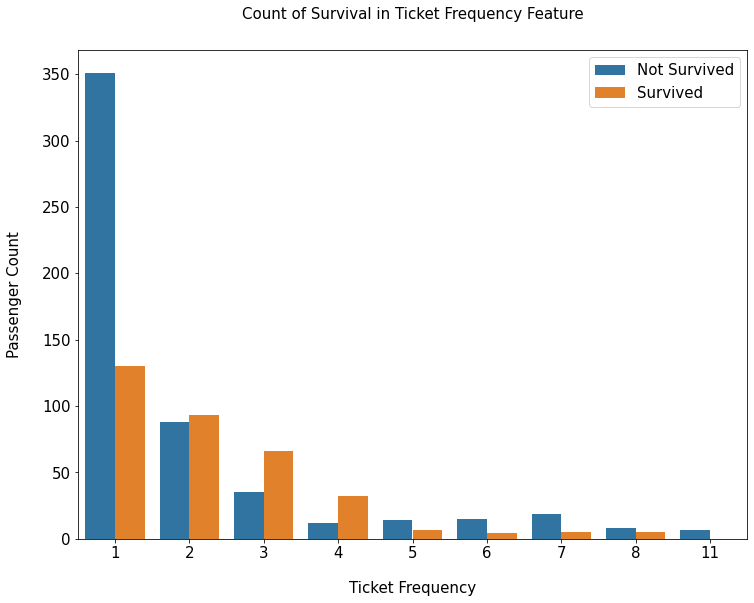

In [179]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

# Plot Frecuency of Ticket
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

## Frecuency Encoding of Title & Is Married
* Title is created by extracting the prefix before Name feature.

* According to graph below, there are many titles that are occuring very few times. Some of those titles doesn't seem correct and they need to be replaced. 
 
* Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona titles are replaced with Miss/Mrs/Ms because all of them are female. 
 
* Values like Mlle, Mme and Dona are actually the name of the passengers, but they are classified as titles because Name feature is split by comma.
 
* Dr, Col, Major, Jonkheer, Capt, Sir, Don and Rev titles are replaced with Dr/Military/Noble/Clergy because those passengers have similar characteristics. 
 
* Master is a unique title. It is given to male passengers below age 26. -> They have the highest survival rate among all males.
 
* Is_Married is a binary feature based on the Mrs title. -> Mrs title has the highest survival rate among other female titles. This title needs to be a feature because all female titles are grouped with each other.

In [181]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1
df_all['Title'].value_counts()


Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Capt              1
Dona              1
Lady              1
Don               1
Sir               1
the Countess      1
Jonkheer          1
Name: Title, dtype: int64

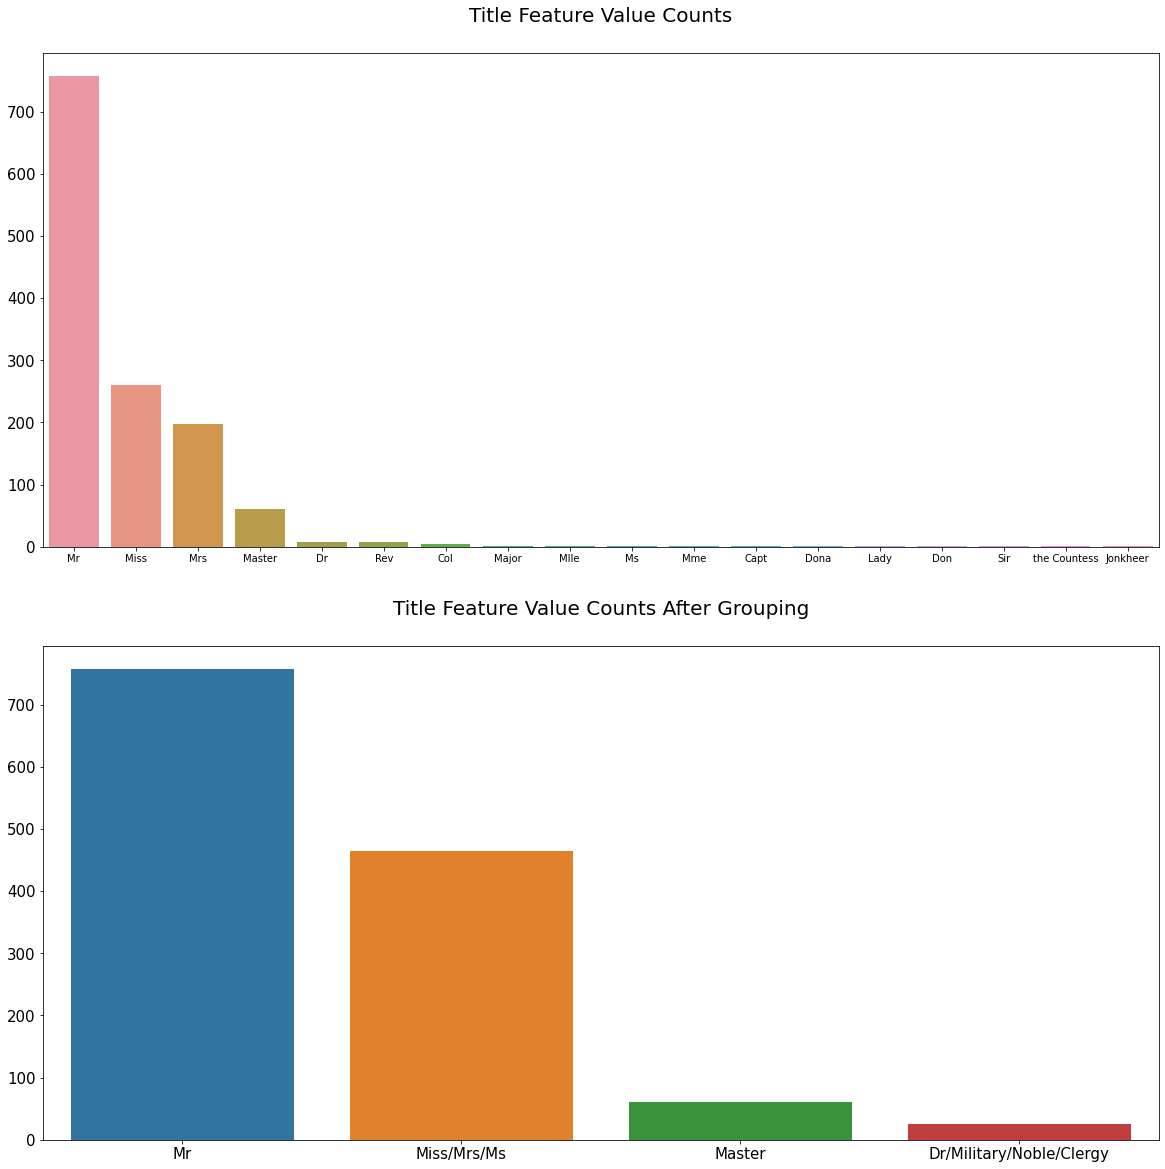

In [182]:
df_title_counts = df_all['Title'].value_counts()

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_title_counts.index, y=df_title_counts.values, ax=axs[0])
axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)
axs[0].tick_params(axis='y', labelsize=15)
axs[1].tick_params(axis='y', labelsize=15)
axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

# Group Title Names
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

# Family Surname Feature
Family feature is created with the extracted surname. This is necessary for grouping passengers in the same family.

In [183]:
df_all['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [185]:
def extract_surname(data): 
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        import string
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

### Family Surname - Survival Rate
Now that we have grouped passenger per family Surname , we can analyze the relantionship with Survival Rate

The survival rate is calculated for families with more than 1 members in that list, and stored in <code>Family_Survival_Rate</code> feature(basically for training set).

An extra binary feature <code>Family_Survival_Rate_NA</code> is created for families that are unique to the test set. This feature is also necessary because there is no way to calculate those families' survival rate. This feature implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.

<code>Ticket_Survival_Rate</code> and <code>Ticket_Survival_Rate_NA</code> features are also created with the same method. 

So: 

<code>Family_Survival_Rate</code> and <code>Ticket_Survival_Rate</code> are averaged and become <code><b>Survival_Rate</b><code>

<code>Ticket_Survival_Rate_NA</code> and <code>Family_Survival_Rate_NA</code> are also averaged and become <code><b>Survival_Rate_NA</b></code>.

In [191]:
# Creating a list of families and tickets that are occuring in both training and test set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
df_family_survival_rate = df_train.groupby('Family')['Family','Survived','Family_Size'].median()
print(df_family_survival_rate)


non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]
df_ticket_survival_rate = df_train.groupby('Ticket')['Ticket','Survived','Ticket_Frequency'].median()

print(df_ticket_survival_rate)

               Survived  Family_Size
Family                              
Abbing              0.0          1.0
Abbott              0.5          3.0
Abelson             0.5          2.0
Adahl               0.0          1.0
Adams               0.0          1.0
...                 ...          ...
de Mulder           1.0          1.0
de Pelsmaeker       0.0          1.0
del Carlo           0.0          2.0
van Billiard        0.0          3.0
van Melkebeke       0.0          1.0

[667 rows x 2 columns]
             Survived  Ticket_Frequency
Ticket                                 
110152            1.0                 3
110413            1.0                 3
110465            0.0                 2
110564            1.0                 1
110813            1.0                 2
...               ...               ...
W./C. 6608        0.0                 5
W./C. 6609        0.0                 1
W.E.P. 5734       0.0                 2
W/C 14208         0.0                 1
WE/P 5735      

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [192]:
family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    # Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    # Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

In [193]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [194]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [195]:
df_train.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,...,1,Mr,0,Braund,0.383838,0,0.383838,0,0.383838,0.0
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,...,2,Miss/Mrs/Ms,1,Cumings,1.000000,1,1.000000,1,1.000000,1.0
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,...,1,Miss/Mrs/Ms,0,Heikkinen,0.383838,0,0.383838,0,0.383838,0.0
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,...,2,Miss/Mrs/Ms,1,Futrelle,0.383838,0,0.383838,0,0.383838,0.0
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,...,1,Mr,0,Allen,0.383838,0,0.383838,0,0.383838,0.0


In [197]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      891 non-null    float64 
 1   Deck                     891 non-null    object  
 2   Embarked                 891 non-null    object  
 3   Fare                     891 non-null    float64 
 4   Name                     891 non-null    object  
 5   Parch                    891 non-null    int64   
 6   PassengerId              891 non-null    int64   
 7   Pclass                   891 non-null    int64   
 8   Sex                      891 non-null    object  
 9   SibSp                    891 non-null    int64   
 10  Survived                 891 non-null    float64 
 11  Ticket                   891 non-null    object  
 12  Fare_bin                 891 non-null    category
 13  Age_bin                  891 non-null    category
 14  Family_Siz

## Feature Transformation


### Label Encoding Non-Numerical Features
Embarked, Sex, Deck , Title and Family_Size_Grouped are object type, and Age_bin and Fare_bin features are category type. They are converted to numerical type with LabelEncoder. 

LabelEncoder basically labels the classes from 0 to n. This process is necessary for models to learn from those features.

In [201]:
from sklearn.preprocessing import LabelEncoder
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age_bin', 'Fare_bin']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])
df_train[ ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age_bin', 'Fare_bin']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Embarked,Sex,Deck,Title,Family_Size_Grouped,Age_bin,Fare_bin
0,2,1,3,3,3,2,0
1,0,0,0,2,3,7,11
2,2,0,3,2,0,4,3
3,2,0,0,2,3,7,10
4,2,1,3,3,0,7,3
...,...,...,...,...,...,...,...
886,2,1,3,0,0,5,5
887,2,0,0,2,0,1,9
888,2,0,3,2,3,2,8
889,0,1,0,3,0,4,9


### One-Hot Encoding the Categorical Features
The categorical features (Pclass, Sex, Deck, Embarked, Title) are converted to one-hot encoded features with OneHotEncoder. 

Age_bin and Fare_bin features are not converted because they are ordinal unlike the previous ones.

In [203]:
from sklearn.preprocessing import OneHotEncoder
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

,Pclass,Sex,Deck,Embarked,Title,Family_Size_Grouped
0,3,1,3,2,3,3
1,1,0,0,0,2,3
2,3,0,3,2,2,0
3,1,0,0,2,2,3
4,3,1,3,2,3,0
...,...,...,...,...,...,...
886,2,1,3,2,0,0
887,1,0,0,2,2,0
888,3,0,3,2,2,3
889,1,1,0,0,3,0


In [204]:
df_train.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,22.0,3,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,38.0,0,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,26.0,3,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,35.0,0,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,3,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Feature Engineer Conclusion

In [205]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA', 'Age', 'Fare' ]

df_all.drop(columns=drop_cols, inplace=True)
print(df_all.columns)
df_all.head()

Index(['Age_bin', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Embarked_1',
       'Embarked_2', 'Embarked_3', 'Family_Size_Grouped_1',
       'Family_Size_Grouped_2', 'Family_Size_Grouped_3',
       'Family_Size_Grouped_4', 'Fare_bin', 'Is_Married', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2', 'Survival_Rate',
       'Survival_Rate_NA', 'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3',
       'Title_4'],
      dtype='object')


,Age_bin,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,...,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0


Age and Fare features are binned. Binning helped dealing with outliers and it revealed some homogeneous groups in those features. 

Family_Size is created by adding Parch and SibSp features and 1. 

Ticket_Frequency is created by counting the occurence of Ticket values.

Name feature is very useful.
    - First, Title and Is_Married features are created from the title prefix in the names.
    - Second, Family_Survival_Rate and Family_Survival_Rate_NA features are created by target encoding the surname of the passengers.
    
Ticket_Survival_Rate is created by target encoding the Ticket feature. 

Survival_Rate feature is created by averaging the Family_Survival_Rate and Ticket_Survival_Rate features.

Finally, the non-numeric type features are label encoded and categorical features are one-hot encoded.

Created 5 new features (Family_Size, Title, Is_Married, Survival_Rate and Survival_Rate_NA) and dropped the useless features after encoding.